## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [18]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as sns

from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Lecture Materials/Module 3/Week 1/Day 3/data/50_Startups.csv')

In [9]:
dataset=pd.read_csv('50_Startups (1).csv')

In [10]:
len(dataset)

50

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
dataset.shape

(50, 5)

In [13]:
dataset.size

250

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


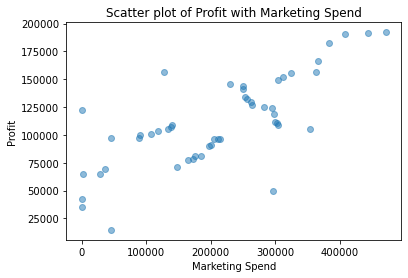

In [23]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

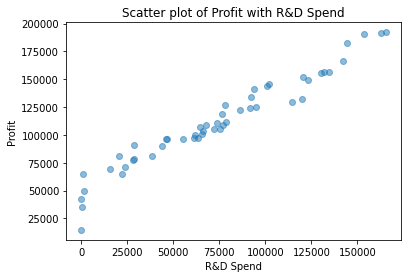

In [ ]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

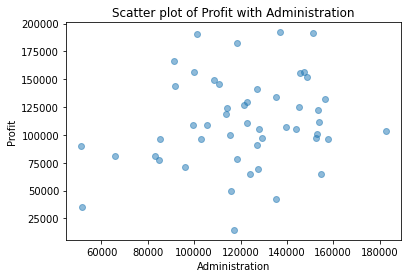

In [ ]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

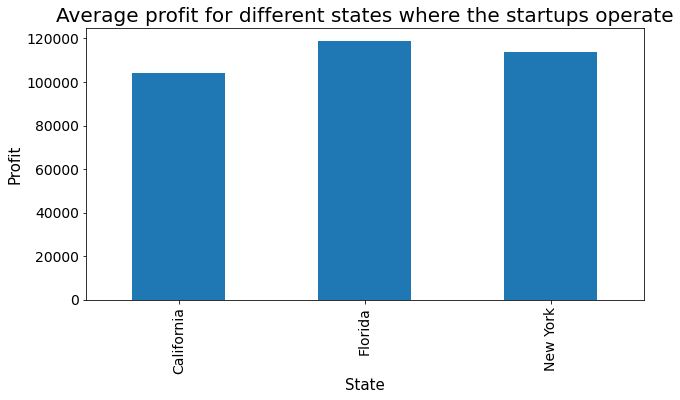

In [ ]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [24]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [25]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [26]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [27]:
dependent_variable = 'Profit'

In [28]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [29]:
independent_variables

['Marketing Spend',
 'R&D Spend',
 'Administration',
 'Florida_State',
 'California_State',
 'NewYork_State']

In [45]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [46]:
dataset[independent_variables]

,Marketing Spend,R&D Spend,Administration,Florida_State,California_State,NewYork_State
0,471784.10,165349.20,136897.80,0,0,1
1,443898.53,162597.70,151377.59,0,1,0
2,407934.54,153441.51,101145.55,1,0,0
3,383199.62,144372.41,118671.85,0,0,1
4,366168.42,142107.34,91391.77,1,0,0
5,362861.36,131876.90,99814.71,0,0,1
6,127716.82,134615.46,147198.87,0,1,0
7,323876.68,130298.13,145530.06,1,0,0
8,311613.29,120542.52,148718.95,0,0,1
9,304981.62,123334.88,108679.17,0,1,0


In [47]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
X_train.shape

(40, 6)

# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train

array([[2.1463481e+05, 5.5493950e+04, 1.0305749e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0551764e+05, 4.6014020e+04, 8.5047440e+04, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3405007e+05, 7.5328870e+04, 1.4413598e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1079767e+05, 4.6426070e+04, 1.5769392e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.9491957e+05, 9.1749160e+04, 1.1417579e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2387668e+05, 1.3029813e+05, 1.4553006e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5651292e+05, 1.1994324e+05, 1.5654742e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9039300e+03, 1.0002300e+03, 1.2415304e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 5.4205000e+02, 5.1743150e+04, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0713838e+05, 6.5605480e+04,

In [50]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
regressor.intercept_

42467.529248553095

In [52]:
regressor.coef_

array([ 3.66100259e-02,  7.73467193e-01,  3.28845975e-02, -8.72645791e+02,
        8.66383692e+01,  7.86007422e+02])

In [53]:
y_pred_train = regressor.predict(X_train)

In [54]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [55]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [56]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [57]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [58]:
mean_squared_error(y_test, y_pred)

83502864.03257726

In [59]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [60]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794939

In [61]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [62]:
r2_score(y_test, y_pred)

0.9347068473282426